In [27]:
%load_ext autoreload
%autoreload 2

from msr.signals.ppg import PPGSignal
from msr.signals.ecg import ECGSignal
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **Loading data and creating Signals objects**

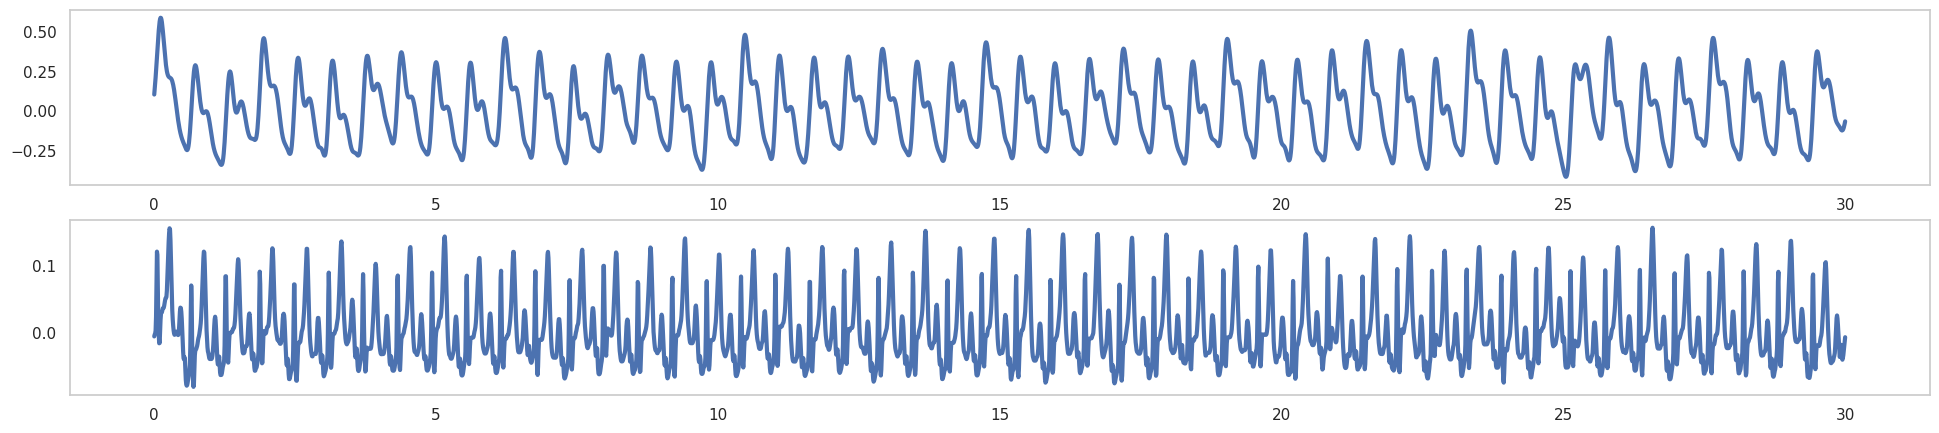

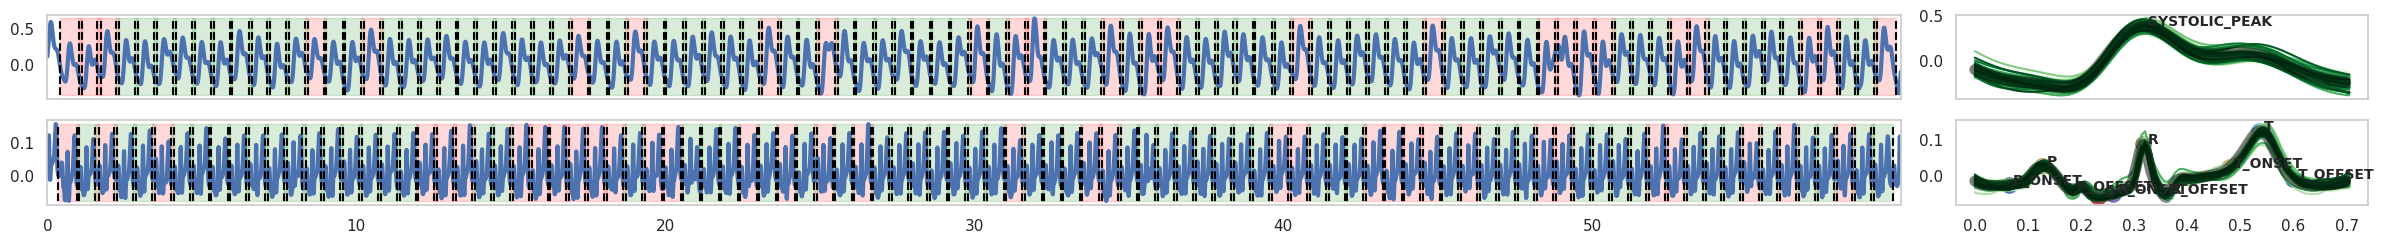

In [100]:
data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[555]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_to_peak=True)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']
ecg_sig = measurement['ecg']

fig, axes = plt.subplots(2, 1, figsize=(24, 5))
measurement.plot(0, 30, axes=axes)
measurement.plot_beats_segmentation(invalid=False)

{'peaks': array([0.0869014 , 0.00744724, 0.08662053, 0.66228526, 1.73183571]),
 'troughs': array([-0.0612885 ,  0.00565606, -0.0613395 ,  0.16019477,  1.2709081 ]),
 'amplitudes': array([0.1481899 , 0.00811634, 0.14746865, 0.80089635, 2.2148512 ])}

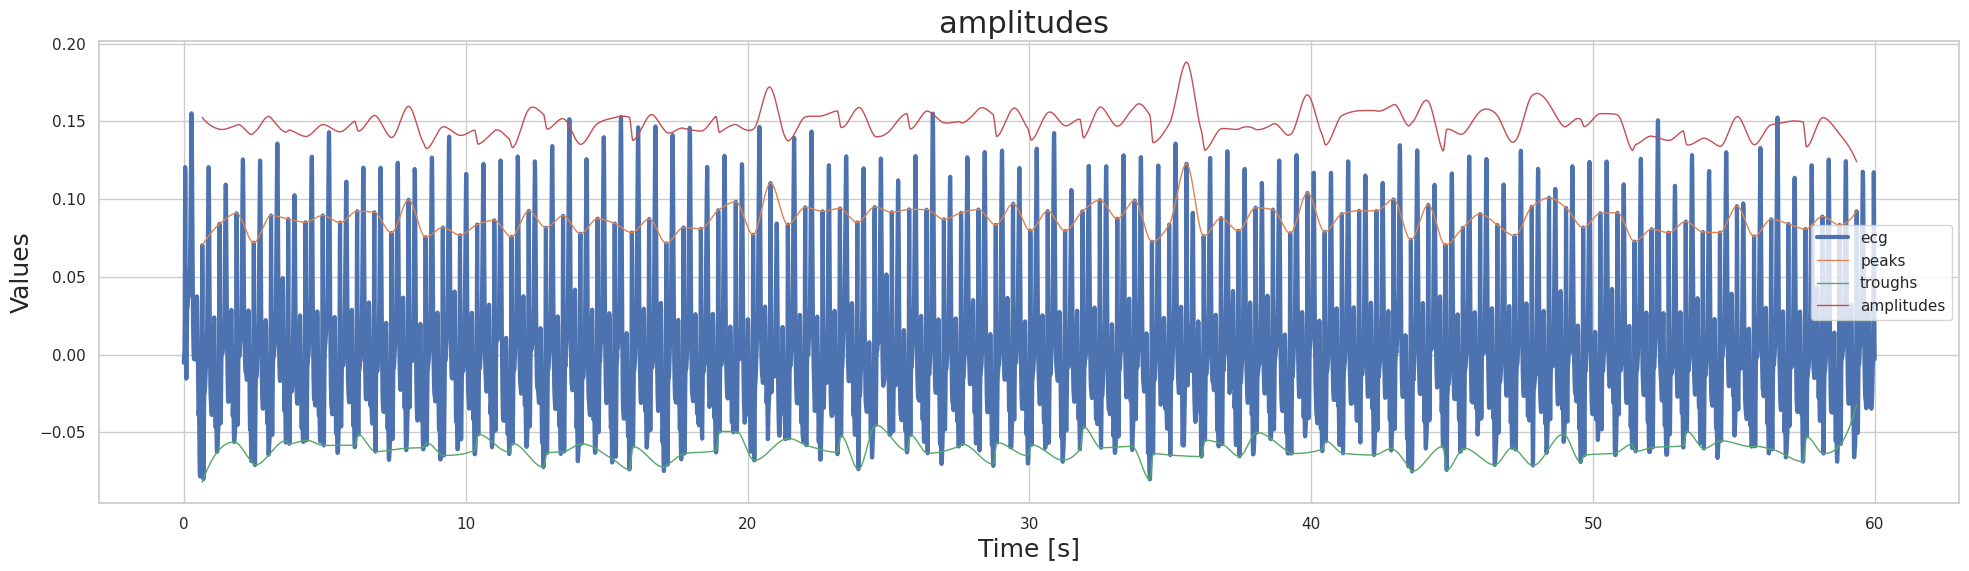

In [101]:
ecg_sig.extract_peaks_troughs_features(return_arr=False, plot=True)

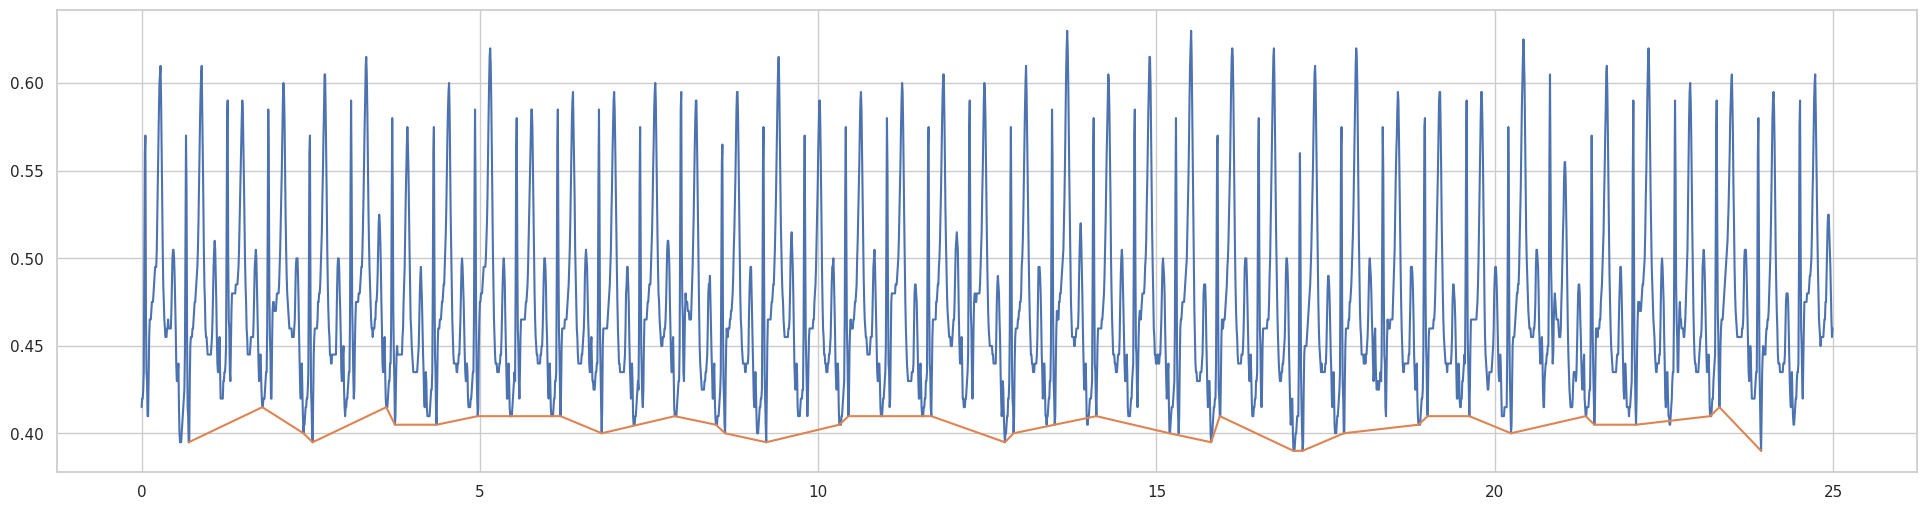

In [102]:
fig, ax = plt.subplots(figsize=(24, 6))

_sig = ecg_sig.get_slice(0, 25)

ax.plot(_sig.time, _sig.data)
ax.plot(_sig.time[_sig.troughs], _sig.data[_sig.troughs])
